In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer, __qiskit_version__
from qiskit.visualization import plot_histogram

__Problem__: Given a black box with 4 possible functions (const-0, const-1, identity, negation)  
Decide if the function inside the black box is (const-0 or const-1) or (identity, negation)
  
With a classical computer we can figure out if `f(x)` is constant or variable function with a minimum of 2 operations, but with a quantum circuit we can do it with one operation.
  
We need to use 2 qubits for this circuit:  
*q0* has `|x>` as input, and `|x>` as output  
*q1* has `|0>` as input, and `f(x)` as output (result of mystery function)

##### Constant 0 and Constant 1

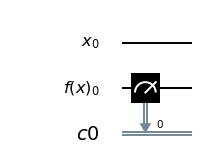

In [2]:
# constant 0 function (does nothing and) produces a 0 output for all inputs
q1 = QuantumRegister(1, 'x')
q2 = QuantumRegister(1, 'f(x)')
q3 = QuantumRegister(1, 'x')
q4 = QuantumRegister(1, 'f(x)')
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
qc1 = QuantumCircuit(q1, q2, c1)
qc2 = QuantumCircuit(q3, q4, c2)
simulator = Aer.get_backend('qasm_simulator')

# no operator needed to produce 0 as output
qc1.measure(q2, 0)
qc1.draw(output='mpl')

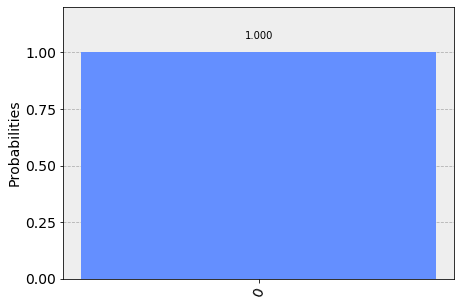

In [3]:
result = execute(qc1, backend=simulator).result()
plot_histogram(result.get_counts(qc1))

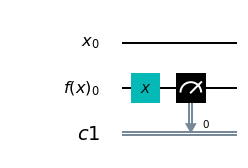

In [4]:
# just bit flip from |0> to |1>
qc2.x(1)
qc2.measure(1, 0)
qc2.draw(output='mpl')

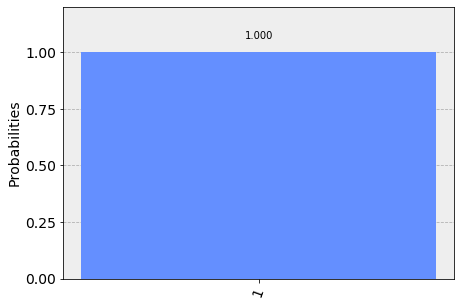

In [5]:
result = execute(qc2, backend=simulator).result()
plot_histogram(result.get_counts(qc2))

#### identity and negation operators

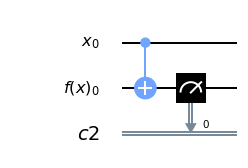

In [6]:
q5 = QuantumRegister(1, 'x')
q6 = QuantumRegister(1, 'f(x)')
q7 = QuantumRegister(1, 'x')
q8 = QuantumRegister(1, 'f(x)')
c3 = ClassicalRegister(1)
c4 = ClassicalRegister(1)
qc3 = QuantumCircuit(q5, q6, c3)
qc4 = QuantumCircuit(q7, q8, c4)

# identity: if x=0, then f(x)=0 and if x=1 then f(x)=1 
qc3.cx(0,1)
qc3.measure(1, 0)
qc3.draw(output='mpl')

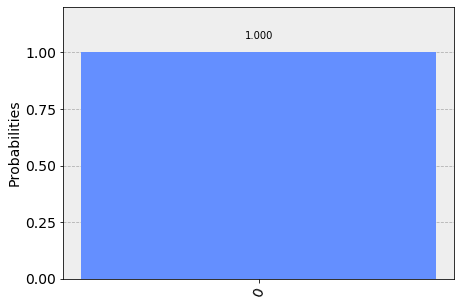

In [7]:
result = execute(qc3, backend=simulator).result()
plot_histogram(result.get_counts(qc3))

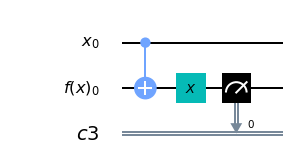

In [8]:
# negation operator: x=0 => f(x)=1 and x=1 => f(x)=0
qc4.cx(0,1)
qc4.x(1)
qc4.measure(1,0)
qc4.draw(output='mpl')

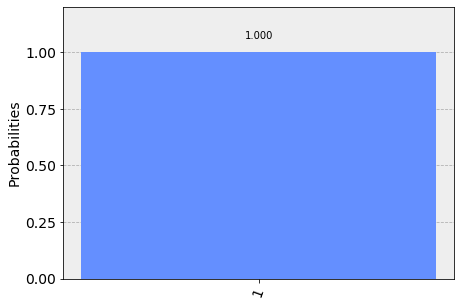

In [9]:
result = execute(qc4, backend=simulator).result()
plot_histogram(result.get_counts(qc4))

### Solution

*q0* is the input and *q1* is the answer bit  
If constant=0 or constant-1 the output should be `|11>`  
If identity or negation, the output should be `|10>`

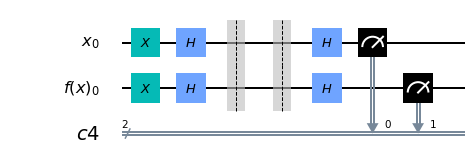

In [10]:
x0 = QuantumRegister(1, 'x')
b0 = QuantumRegister(1, 'f(x)')
creg0 = ClassicalRegister(2)
circuit0 = QuantumCircuit(x0, b0, creg0)

circuit0.x([0,1])
circuit0.h([0,1])
circuit0.barrier()

# constant 0 - do nothing, the hadamard will take both bits back to |1>, so |11>

circuit0.barrier()
circuit0.h([0,1])
circuit0.measure(0,0)
circuit0.measure(1,1)
circuit0.draw(output='mpl')

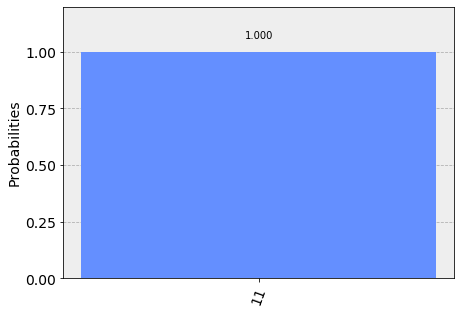

In [11]:
result = execute(circuit0, backend=simulator).result()
plot_histogram(result.get_counts(circuit0))

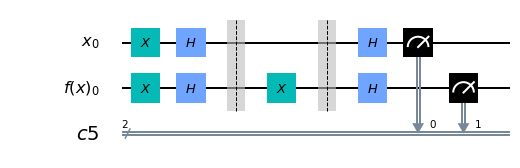

In [12]:
x1 = QuantumRegister(1, 'x')
b1 = QuantumRegister(1, 'f(x)')
creg1 = ClassicalRegister(2)
circuit1 = QuantumCircuit(x1, b1, creg1)
circuit1.x([0,1])
circuit1.h([0,1])
circuit1.barrier()

# constant 1 - bit flip takes q1 from |-> to -|->, then H takes it to -1, so |11>
circuit1.x(1)

circuit1.barrier()
circuit1.h([0,1])
circuit1.measure(0,0)
circuit1.measure(1,1)
circuit1.draw(output='mpl')

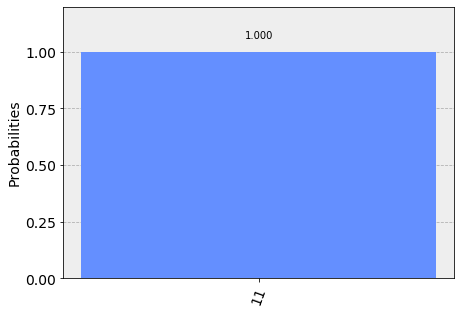

In [13]:
result = execute(circuit1, backend=simulator).result()
plot_histogram(result.get_counts(circuit1))

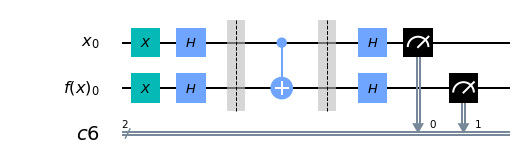

In [14]:
x2 = QuantumRegister(1, 'x')
b2 = QuantumRegister(1, 'f(x)')
creg2 = ClassicalRegister(2)
circuit2 = QuantumCircuit(x2, b2, creg2)
circuit2.x([0,1])
circuit2.h([0,1])
circuit2.barrier()

# identity - CNOT from q0 to q1, measure should find |01>
circuit2.cx(0,1)

circuit2.barrier()
circuit2.h([0,1])
circuit2.measure(0,0)
circuit2.measure(1,1)
circuit2.draw(output='mpl')

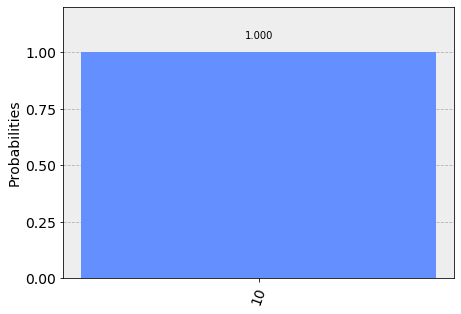

In [15]:
result = execute(circuit2, backend=simulator).result()
plot_histogram(result.get_counts(circuit2))

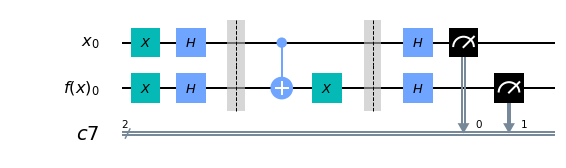

In [16]:
x3 = QuantumRegister(1, 'x')
b3 = QuantumRegister(1, 'f(x)')
creg3 = ClassicalRegister(2)
circuit3 = QuantumCircuit(x3, b3, creg3)
circuit3.x([0,1])
circuit3.h([0,1])
circuit3.barrier()

# negation - CNOT from q0 to q1 then X applied to q1, measure should find |01>
circuit3.cx(0,1)
circuit3.x(1)

circuit3.barrier()
circuit3.h([0,1])
circuit3.measure(0,0)
circuit3.measure(1,1)
circuit3.draw(output='mpl')

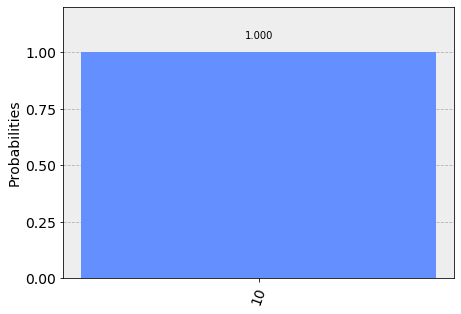

In [17]:
result = execute(circuit3, backend=simulator).result()
plot_histogram(result.get_counts(circuit3))

In [18]:
__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}